In [131]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [132]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# specify the url of the business page on Google
url = 'https://www.google.com/maps/place/Shawarma+Joint/@40.110194,-88.2292969,17z/data=!4m8!3m7!1s0x880cd75a94f06a39:0x384e21b7611f191e!8m2!3d40.110194!4d-88.2292969!9m1!1b1!16s%2Fg%2F11nf1gt8nh?hl=en&hl=en&entry=ttu'

reviews_list = []

# create an instance of the Chrome driver
driver = webdriver.Chrome()

# navigate to the specified url
driver.get(url)

In [39]:
elements = WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.XPATH, "//button[@class='w8nwRe kyuRq']")))
for elem in elements:
    elem.click()

In [40]:
wait = WebDriverWait(driver, 20) # increased the waiting time
review_elements = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'wiI7pd')))

        
# extract the text of each review
for element in review_elements:
    reviews_list.append(element.text) 

df_google = pd.DataFrame(reviews_list)

# close the browser
driver.quit()

In [41]:
#df.to_csv("googlereviews.csv")
df_google.columns = ['reviews']
print(df_google.to_string())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        reviews
0                                                                                                                                                                       

In [133]:
df_google_copy = df_google

1. Data Preprocessing
Clean and structure the text data to prepare it for analysis.

Text Cleaning:
Remove special characters, HTML tags, emojis, and irrelevant symbols.
Convert text to lowercase to ensure consistency.

Tokenization:
Split text into individual words or phrases.

Stopwords Removal:
Eliminate common words (e.g., "the," "and," "is") that don't add meaning.

Stemming/Lemmatization:
Reduce words to their root form (e.g., "deliciously" → "delicious").

In [134]:
#text cleaning (maybe add drop if length shorter than _)
pattern = r'[^\w\s]'
df_google_copy['reviews'] = df_google_copy['reviews'].replace(pattern, '', regex=True)
df_google_copy["reviews"] = df_google_copy['reviews'].str.lower()

df_google_copy = df_google_copy.drop_duplicates().dropna().reset_index(drop=True)

df_google_copy = df_google_copy[df_google_copy["reviews"].str.len() >= 5].reset_index(drop=True)

In [135]:
#stopword
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(review):
    words = review.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'text' column
df_google_copy['w/ostopwords'] = df_google_copy['reviews'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srikarpoladi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
#stemming
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
df_google_copy['w/ostopwords'] = df_google_copy['w/ostopwords'].apply(lambda x: lemmatizer.lemmatize(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/srikarpoladi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srikarpoladi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [137]:
#tokenized
df_google_copy['tokenized'] = df_google_copy['w/ostopwords'].apply(word_tokenize)

In [138]:
df_google_copy.head()


,reviews,w/ostopwords,tokenized
0,great spot for quick bite to eat had a few dif...,great spot quick bite eat different wraps bowl...,"[great, spot, quick, bite, eat, different, wra..."
1,hello tommy thank you for the positive rating ...,hello tommy thank positive rating appreciate b...,"[hello, tommy, thank, positive, rating, apprec..."
2,got the lunch special with fries and soda real...,got lunch special fries soda really loved serv...,"[got, lunch, special, fries, soda, really, lov..."
3,my kid convinced me to try it said the best re...,kid convinced try said best restaurant green s...,"[kid, convinced, try, said, best, restaurant, ..."
4,hello ana thank you for your five star rating ...,hello ana thank five star rating appreciate bu...,"[hello, ana, thank, five, star, rating, apprec..."


2. Exploratory Data Analysis (EDA)
Understand the structure and content of the dataset.

Word Frequency Analysis:
Identify the most frequently mentioned words in reviews.

Phrase Extraction:
Extract common bigrams or trigrams (e.g., "great service," "delicious food").

Review Length Distribution:
Analyze the length of reviews (e.g., average word count).

In [139]:
#word Frequency analysis
from collections import Counter


all_reviews = ' '.join(df_google_copy['w/ostopwords'])
all_words = all_reviews.split()
word_counts = Counter(all_words)

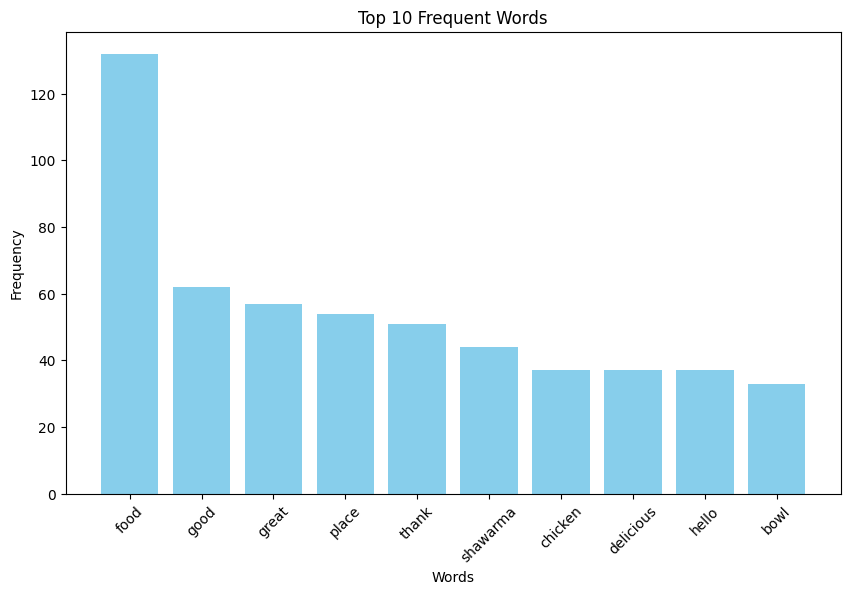

In [140]:
import matplotlib.pyplot as plt

word_freq_df = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])
top_words = word_freq_df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Words')
plt.xticks(rotation=45)
plt.show()

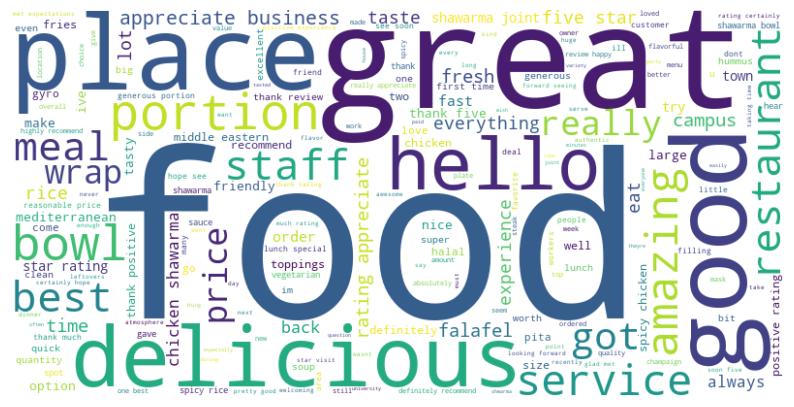

In [141]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [142]:
#common Phrase Extraction

from nltk.util import ngrams

all_reviews = ' '.join(df_google_copy['w/ostopwords'])  # Make sure this column exists
tokens = word_tokenize(all_reviews.lower())

bigrams = list(ngrams(tokens, 2))  
trigrams = list(ngrams(tokens, 3))
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print(bigram_counts.most_common(10))  
print(trigram_counts.most_common(10)) 

[(('appreciate', 'business'), 21), (('rating', 'appreciate'), 19), (('five', 'star'), 18), (('chicken', 'shawarma'), 15), (('star', 'rating'), 13), (('shawarma', 'joint'), 13), (('thank', 'five'), 12), (('spicy', 'chicken'), 11), (('thank', 'positive'), 11), (('positive', 'rating'), 11)]
[(('rating', 'appreciate', 'business'), 19), (('five', 'star', 'rating'), 13), (('thank', 'five', 'star'), 12), (('star', 'rating', 'appreciate'), 12), (('thank', 'positive', 'rating'), 11), (('hope', 'see', 'soon'), 7), (('positive', 'rating', 'appreciate'), 6), (('chicken', 'shawarma', 'bowl'), 6), (('thank', 'taking', 'time'), 5), (('looking', 'forward', 'seeing'), 5)]


<Axes: xlabel='length', ylabel='Count'>

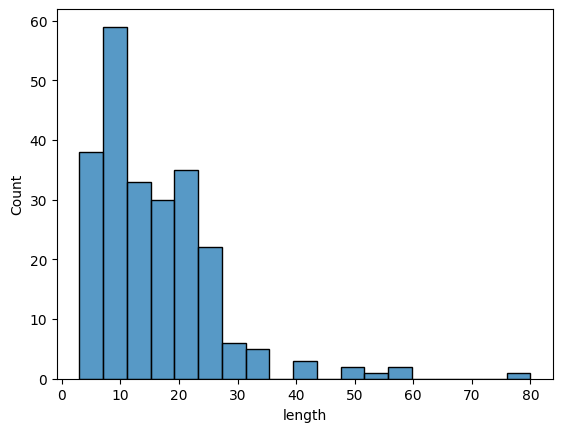

In [143]:
#length of reviews 

import seaborn as sns

df_google_copy["length"] = df_google_copy["tokenized"].str.len()
sns.histplot(data=df_google_copy, x = "length")

3. Sentiment Analysis
Determine the emotional tone of the reviews.

Pretrained Models:
Use tools like VADER (NLTK), TextBlob, or Hugging Face models to classify sentiment (positive, neutral, negative).

Polarity Scores:
Assign scores to reviews to quantify sentiment intensity.

Cluster Sentiments:
Group reviews into broad sentiment categories for further analysis.

In [147]:
#classify sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Apply VADER and get compound sentiment scores
df_google_copy['vader_scores'] = df_google_copy['reviews'].apply(sid.polarity_scores)
df_google_copy['compound_score'] = df_google_copy['vader_scores'].apply(lambda x: x['compound'])
df_google_copy['sentiment'] = df_google_copy['compound_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srikarpoladi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [149]:
#polarity scores
print(df_google_copy['compound_score'].describe())

count    237.000000
mean       0.702922
std        0.326564
min       -0.891200
25%        0.636900
50%        0.831600
75%        0.907800
max        0.994000
Name: compound_score, dtype: float64


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_33538/1135572651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_counts, x='sentiment', y='count', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_

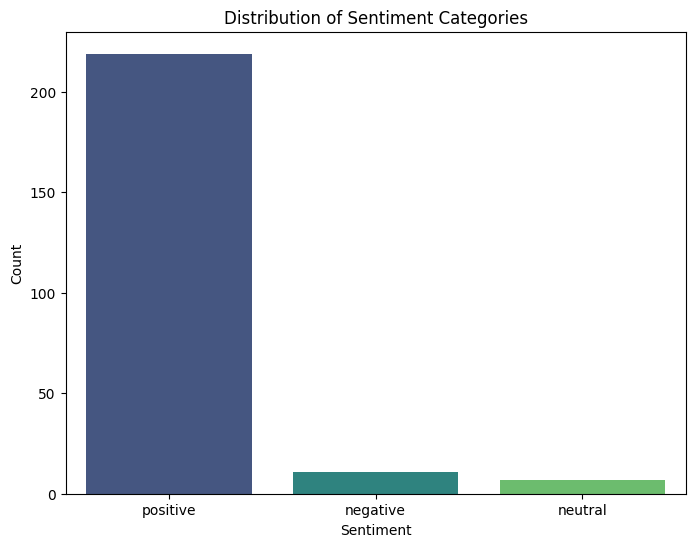

In [153]:
# Plot sentiment categories
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df_google_copy['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=sentiment_counts, x='sentiment', y='count', palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [155]:
#cluster sentiment
sentiment_groups = df_google_copy.groupby('sentiment').size().reset_index(name='count')
print(sentiment_groups)



def extract_phrases(text, n=2):
    tokens = text.split()
    return list(ngrams(tokens, n))

for sentiment in ['positive', 'neutral', 'negative']:
    reviews = ' '.join(df_google_copy[df_google_copy['sentiment'] == sentiment]['w/ostopwords'])
    phrases = extract_phrases(reviews, n=2)
    print(f"Frequent phrases for {sentiment}:")
    print(Counter(phrases).most_common(10))


  sentiment  count
0  negative     11
1   neutral      7
2  positive    219
Frequent phrases for positive:
[(('appreciate', 'business'), 21), (('rating', 'appreciate'), 19), (('five', 'star'), 18), (('chicken', 'shawarma'), 14), (('star', 'rating'), 13), (('thank', 'five'), 12), (('shawarma', 'joint'), 12), (('thank', 'positive'), 11), (('positive', 'rating'), 11), (('middle', 'eastern'), 11)]
Frequent phrases for neutral:
[(('food', 'portions'), 1), (('portions', 'big'), 1), (('big', 'shawarma'), 1), (('shawarma', 'rice'), 1), (('rice', 'paid'), 1), (('paid', 'around'), 1), (('around', '1718'), 1), (('1718', 'enough'), 1), (('enough', 'lunch'), 1), (('lunch', 'dinner'), 1)]
Frequent phrases for negative:
[(('long', 'time'), 2), (('wrong', 'order'), 2), (('shwarma', 'joint'), 1), (('joint', 'probably'), 1), (('probably', 'favorite'), 1), (('favorite', 'restaurant'), 1), (('restaurant', 'campus'), 1), (('campus', 'ive'), 1), (('ive', 'going'), 1), (('going', 'years'), 1)]


4. Keyword and Theme Analysis
Identify recurring topics or themes in the reviews.

TF-IDF Analysis:
Highlight words or phrases that are uniquely significant in the dataset.

Topic Modeling:
Use models like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) to uncover common themes.

Aspect-Based Analysis:
Manually label themes (e.g., food, service, ambiance) and associate keywords with each aspect.

In [156]:
#tfidf analysis
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df_google_copy['w/ostopwords'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Get the top terms by TF-IDF score
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
print("Top TF-IDF Keywords:")
print(tfidf_mean)


Top TF-IDF Keywords:
food          0.190090
good          0.125582
thank         0.112448
great         0.109555
place         0.095862
hello         0.087124
shawarma      0.086115
delicious     0.083451
portions      0.081920
rating        0.074482
best          0.074273
time          0.070349
appreciate    0.068645
amazing       0.067412
chicken       0.066757
bowl          0.065252
really        0.064891
staff         0.060827
service       0.055917
spicy         0.045070
dtype: float64


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_33538/2923975394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = 

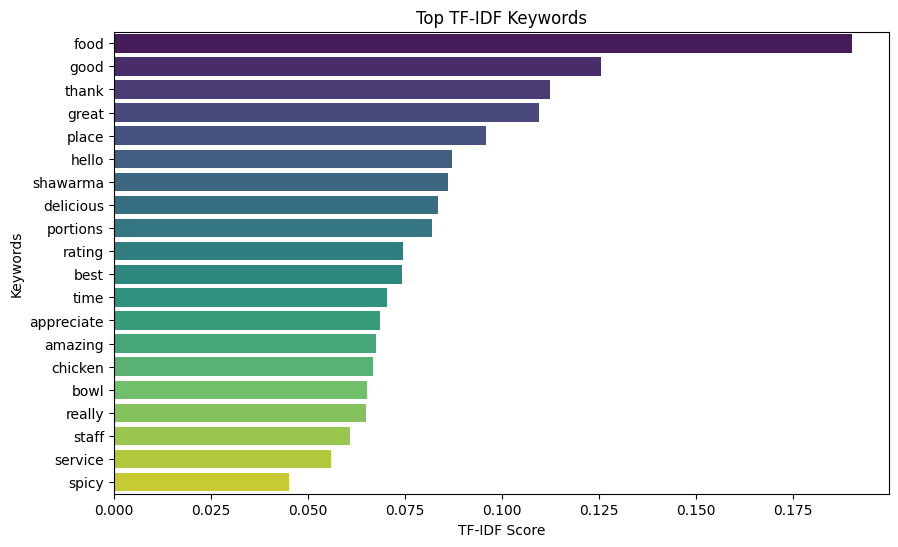

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette='viridis')
plt.title('Top TF-IDF Keywords')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.show()

In [158]:
#topic modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')  # Adjust max_features as needed
dt_matrix = count_vectorizer.fit_transform(df_google_copy['w/ostopwords'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for the number of topics
lda.fit(dt_matrix)

words = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print([words[i] for i in topic.argsort()[-10:]])


Topic 1:
['wrap', 'eat', 'really', 'rice', 'shawarma', 'place', 'bowl', 'delicious', 'food', 'got']
Topic 2:
['positive', 'great', 'good', 'star', 'business', 'hello', 'appreciate', 'rating', 'food', 'thank']
Topic 3:
['portions', 'bowl', 'rice', 'place', 'best', 'spicy', 'shawarma', 'great', 'chicken', 'food']
Topic 4:
['wonderful', 'price', 'amazing', 'thank', 'hello', 'good', 'time', 'great', 'experience', 'food']
Topic 5:
['time', 'recommend', 'definitely', 'chicken', 'best', 'restaurant', 'shawarma', 'place', 'good', 'food']


In [167]:
#aspect based analysis
themes = {
    'food': ['delicious', 'tasty', 'flavor', 'dish', 'shawarma', 'rice', 'chicken', 'bowl', "eat", "rice", "chicken", "spicy"],
    'service': ['friendly', 'rude', 'wait', 'helpful', 'positive', 'thank', 'rating', "appreciate"],
    'ambiance': ['clean', 'cozy', 'atmosphere', 'decor', 'wonderful', 'experience']
}


def label_themes(text):
    aspects = []
    for theme, keywords in themes.items():
        if any(keyword in text for keyword in keywords):
            aspects.append(theme)
    return aspects

df_google_copy['themes'] = df_google_copy['w/ostopwords'].apply(label_themes)

In [168]:
import itertools

theme_counts = Counter(itertools.chain(*df_google_copy['themes']))
print("Theme Counts:")
print(theme_counts)

Theme Counts:
Counter({'food': 148, 'service': 77, 'ambiance': 42})


/var/folders/sb/3g822kv954s3d7032z9m7ckh0000gn/T/ipykernel_33538/3690769184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(theme_counts.keys()), y=list(theme_counts.values()), palette='coolwarm')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

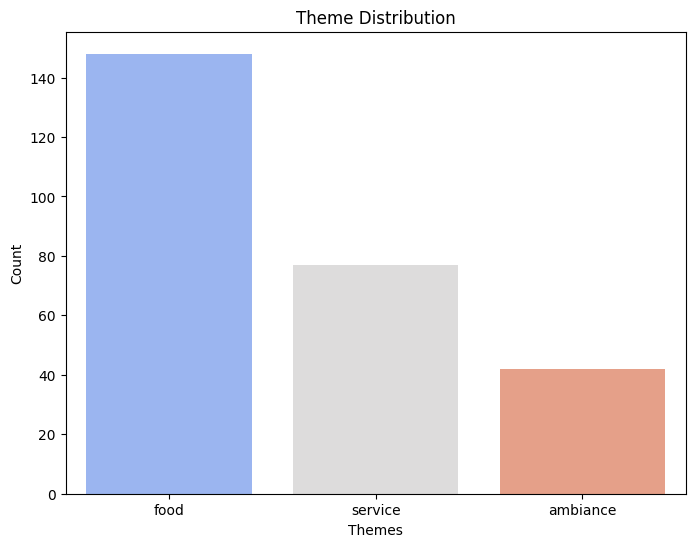

In [169]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(theme_counts.keys()), y=list(theme_counts.values()), palette='coolwarm')
plt.title('Theme Distribution')
plt.xlabel('Themes')
plt.ylabel('Count')
plt.show()

,reviews,w/ostopwords,tokenized,length,vader_scores,compound_score,sentiment,themes
0,great spot for quick bite to eat had a few dif...,great spot quick bite eat different wraps bowl...,"[great, spot, quick, bite, eat, different, wra...",26,"{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...",0.9153,positive,[food]
1,hello tommy thank you for the positive rating ...,hello tommy thank positive rating appreciate b...,"[hello, tommy, thank, positive, rating, apprec...",7,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.8316,positive,[]
2,got the lunch special with fries and soda real...,got lunch special fries soda really loved serv...,"[got, lunch, special, fries, soda, really, lov...",26,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",0.8441,positive,[ambiance]
3,my kid convinced me to try it said the best re...,kid convinced try said best restaurant green s...,"[kid, convinced, try, said, best, restaurant, ...",41,"{'neg': 0.032, 'neu': 0.743, 'pos': 0.225, 'co...",0.9510,positive,"[food, service]"
4,hello ana thank you for your five star rating ...,hello ana thank five star rating appreciate bu...,"[hello, ana, thank, five, star, rating, apprec...",8,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.6369,positive,[]


5. Customer Insights
Extract insights that are actionable for the restaurant.

Common Suggestions:
Look for actionable suggestions mentioned in reviews (e.g., "need more vegetarian options").

In [182]:
suggestion_keywords = ['should', 'more', 'improve', 'better', 'add']

def extract_suggestions(review):
    review_tokens = word_tokenize(review.lower()) 
    suggestions = []
    
    for word in review_tokens:
        if word in suggestion_keywords:
            suggestions.append(" ".join(review_tokens))  
            break 
    
    return suggestions

df_google_copy['suggestions'] = df_google_copy['reviews'].apply(extract_suggestions)
df_suggestions = df_google_copy[df_google_copy['suggestions'].apply(lambda x: len(x) > 0)]
df_suggestions[['reviews', 'suggestions']]

,reviews,suggestions
7,i literally eat from here everyday this is the...,[i literally eat from here everyday this is th...
9,me and a friend came here over thanksgiving we...,[me and a friend came here over thanksgiving w...
21,great place for a quick bite to eat if you get...,[great place for a quick bite to eat if you ge...
48,pretty good mediterranean food gyro and chicke...,[pretty good mediterranean food gyro and chick...
57,a fast food middle eastern fusion with some ve...,[a fast food middle eastern fusion with some v...
64,hello andrew\nwe truly apologize for this expe...,[hello andrew we truly apologize for this expe...
65,a friend recomended this as the best halal opt...,[a friend recomended this as the best halal op...
68,one of the best shawermas i had in a long time...,[one of the best shawermas i had in a long tim...
72,this place is okay i ordered the chicken shawa...,[this place is okay i ordered the chicken shaw...
80,great food would give more stars if my girlfri...,[great food would give more stars if my girlfr...


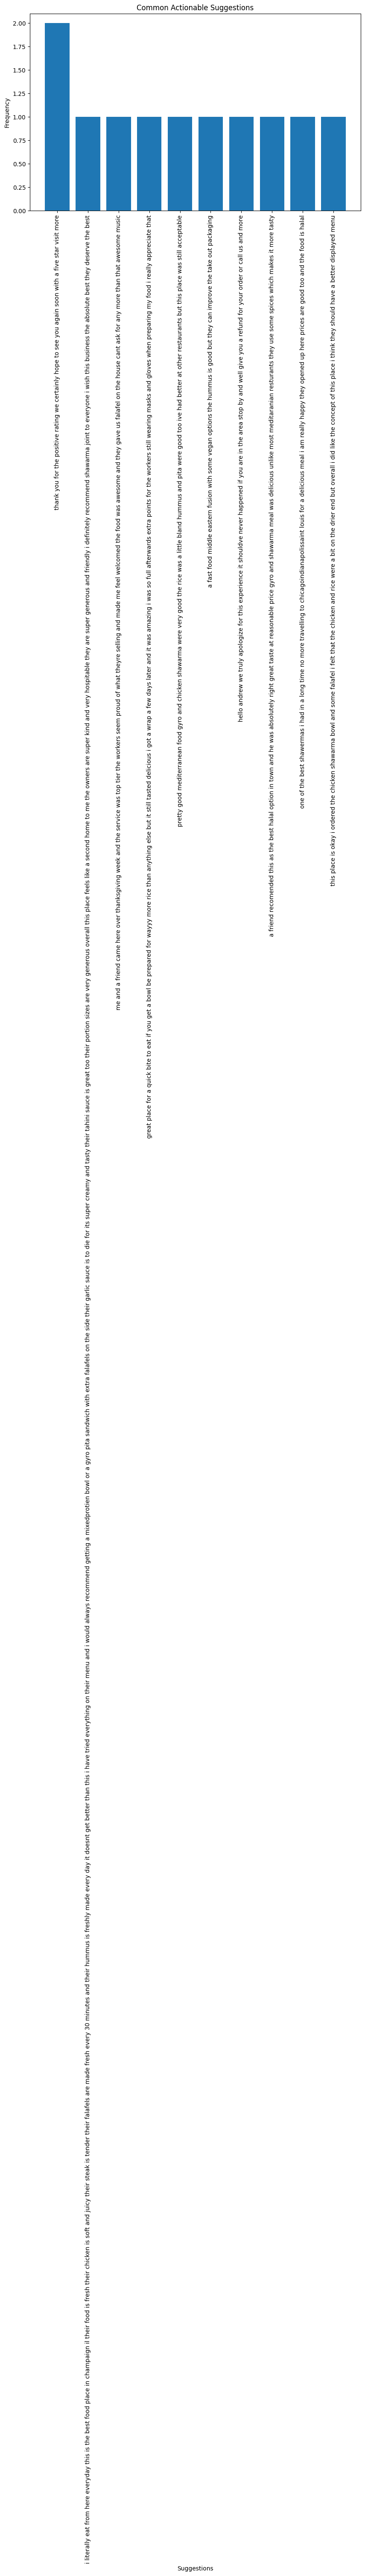

In [183]:
suggestion_counts = Counter(df_suggestions['suggestions'].explode())

plt.figure(figsize=(10,6))
suggestion_counts.most_common(10)  
plt.bar([item[0] for item in suggestion_counts.most_common(10)],
        [item[1] for item in suggestion_counts.most_common(10)])
plt.xticks(rotation=90)
plt.xlabel("Suggestions")
plt.ylabel("Frequency")
plt.title("Common Actionable Suggestions")
plt.show()

8. Automation
Automate the pipeline for scalability and efficiency.

Pipeline Automation:
Use tools like Airflow or Luigi to schedule scraping and data cleaning tasks.

Storage:
Store the cleaned data in a structured format (e.g., CSV, database).

Dashboard Creation:
Build an interactive dashboard using Streamlit, Tableau, or Dash for real-time insights.

In [184]:
df_google.to_csv("/Users/srikarpoladi/Downloads/Reviewproject/googlereviews.csv")